In [1]:
import matplotlib as mpl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from scipy.stats import trim_mean
%matplotlib inline

Reading the dataset 'Life Expectnancy'

In [2]:
lifedata = pd.read_csv('LifeExpectancyData.csv')

Getting to know the dataset

In [3]:
lifedata.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
lifedata.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


According to the dataset the mean life expectancy is about 69.2 years

In [5]:
lifedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

From the above, it is observed that the dataset consists of about 2938 observations with 22 variables (2 of which are qualitatives and 20 are quantitatives).
Also, the inequality in the number of counts/enteries indicates the dataset contains null values, which needs to be deleted or replaced.

In [6]:
# null counts in each column of the dataset
columns = list(lifedata.columns)
nullvalues = []

for i in columns:
    nullvalues.append(lifedata[i].isnull().sum())
# creating a dataframe with null counts
dfnullvalues = pd.DataFrame({'column':columns, 'null':nullvalues})
dfnullvalues

,column,null
0,Country,0
1,Year,0
2,Status,0
3,Life expectancy,10
4,Adult Mortality,10
5,infant deaths,0
6,Alcohol,194
7,percentage expenditure,0
8,Hepatitis B,553
9,Measles,0


For variables with less than 50 null values, we use average to fill the null values.
But first make a copy of the dataset so as to keep the original

In [7]:
dflifedata = lifedata.copy()

In [8]:
nulls_less50 = ['Life expectancy ', 'Adult Mortality', ' BMI ', 'Polio', 'Diphtheria ',
                ' thinness  1-19 years',' thinness 5-9 years']

for i in nulls_less50:
    dflifedata[i] = dflifedata[i].fillna(value = trim_mean(dflifedata[i], 0.1))

In [9]:
# checking for the filled null values
dflifedata.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2938.000000,2938.000000,2938.000000,2712.00000,2938.000000,2938.000000,2490.000000,2.286000e+03,2938.000000,2938.000000,2771.000000,2775.000000
mean,2007.518720,69.227430,164.750423,30.303948,4.602861,738.251295,80.940461,2419.592240,38.333582,42.035739,82.586463,5.93819,82.361455,1.742103,7483.158469,1.275338e+07,4.832554,4.862980,0.627551,11.992793
std,4.613841,9.507736,124.082802,117.926501,4.052413,1987.914858,25.070016,11467.272489,19.928003,160.445548,23.356472,2.49832,23.644612,5.077785,14270.169342,6.101210e+07,4.395032,4.483221,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.200000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.400000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.600000,0.493000,10.100000
50%,2008.000000,72.000000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.000000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.400000,3.400000,0.677000,12.300000
75%,2012.000000,75.600000,227.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.100000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.100000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


Great!!!, the null values were sucessfully filled for the intended columns

Before proced to fill out other columns, it is obsreved that there are some formatting issues with the column titles/names, that needs to be fixed 

In [10]:
# Formatting the column names be removing the unnecessary spaces
dflifedata.rename(columns = {'Life expectancy ':'Life expectancy', ' BMI ':'BMIS', 'Diphtheria ':'Diphtheria',
                ' thinness  1-19 years':'thinness 1-19 years',' thinness 5-9 years':'thinness 5-9 years', 
                             'Measles ':'Measles', 'under-five deaths ':'under-five deaths', ' HIV/AIDS': 'HIV/AIDS'}, inplace = True)

Getting the correlation matrix and heatmap to have a better fit for filling other null values

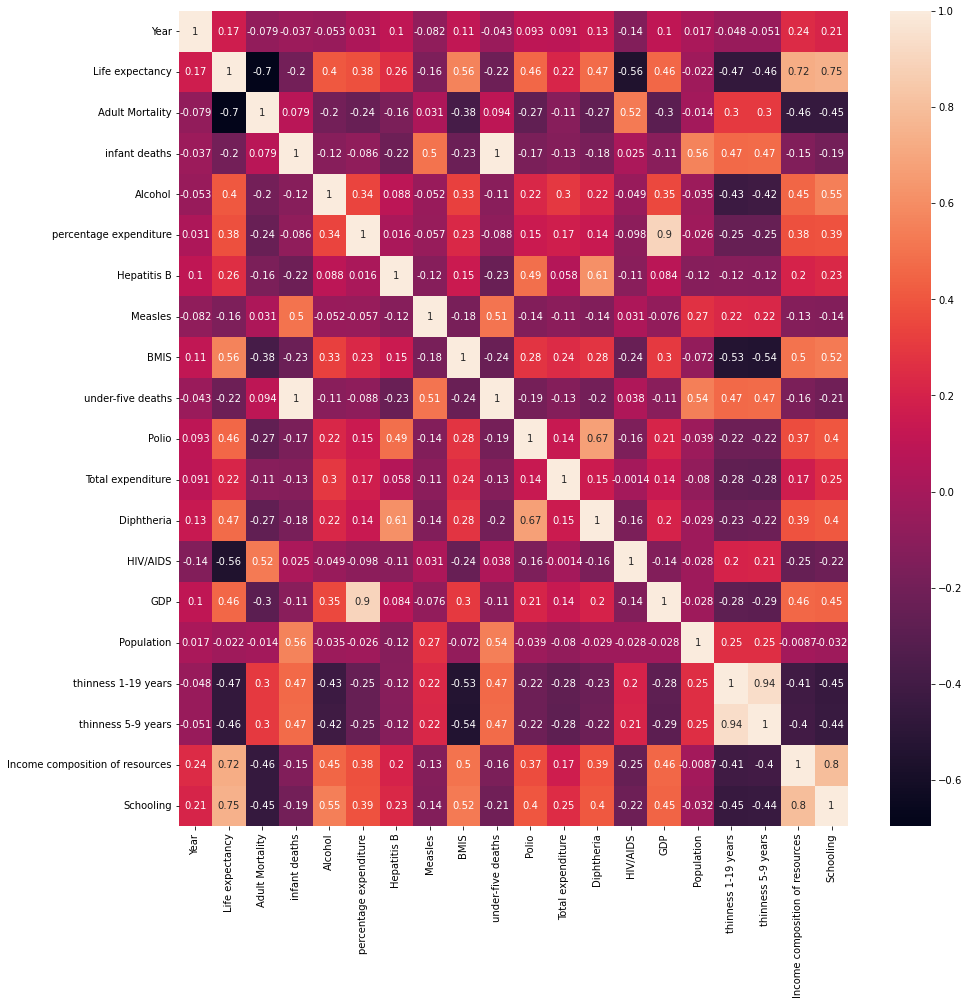

In [11]:
dflifedata_corr = dflifedata.corr()

fig, ax = plt.subplots(figsize =(15, 15))
sns.heatmap(dflifedata_corr, annot = True, ax = ax)
plt.show()

To fill the null values in alcohol: 
Check the variable is most correlated with and plot a scatter plot to see the 
Alcohol is most correlated with schooling

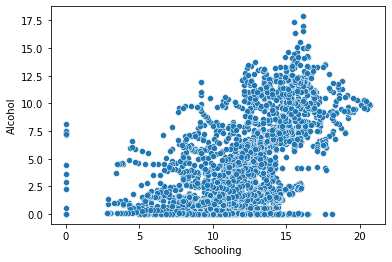

In [12]:
# plot: scatter between schooling and alcohol
sns.scatterplot(x=dflifedata['Schooling'], y=dflifedata['Alcohol'])
plt.show()

Based of the scatterplot, we will fill the null values in alcohol entries/observation propportional to corresponding school value. We will group the data into 4 group of schooling, viz:
1. under 5
2. between 5 and 10
3. between 10 and 15
4. above 15
The average of each group is evaluated and fill the null values accordingly. However, we count the schooling values equal to zero as missing data because there is a gap between 0 values and the minimum value of schooling. 

In [13]:
dflifedata['Alcohol'].isnull().sum()

194

In [14]:
# Grouping and evaluate their mean
under_5 = dflifedata.loc[(dflifedata['Schooling'] < 5) & (dflifedata['Schooling'] != 0)]['Alcohol'].mean()
btw_5_10 = dflifedata.loc[(dflifedata['Schooling'] >= 5) & (dflifedata['Schooling'] < 10)]['Alcohol'].mean()
btw_10_15 = dflifedata.loc[(dflifedata['Schooling'] >= 10) & (dflifedata['Schooling'] < 15)]['Alcohol'].mean()
above_15 = dflifedata.loc[(dflifedata['Schooling'] >= 15)]['Alcohol'].mean()
print('under_5:', under_5, '\nbtw_5_10:', btw_5_10, '\nbtw_10_15:', btw_10_15, '\nabove_15:', above_15)

under_5: 1.731086956521739 
btw_5_10: 2.0701272727272695 
btw_10_15: 4.084567983925003 
above_15: 8.914028925619839


In [15]:
# Filling the null values in Alcohol column with evaluated mean above
dflifedata.loc[(dflifedata['Schooling'] <5) & (dflifedata['Schooling'] !=0) & (dflifedata['Alcohol'].isnull()), ['Alcohol']] = under_5
dflifedata.loc[(dflifedata['Schooling'] >=5) & (dflifedata['Schooling'] > 10) & (dflifedata['Alcohol'].isnull()), ['Alcohol']] = btw_5_10
dflifedata.loc[(dflifedata['Schooling'] >=10)  & (dflifedata['Schooling'] < 15) & (dflifedata['Alcohol'].isnull()), ['Alcohol']] = btw_10_15
dflifedata.loc[(dflifedata['Schooling'] >= 15) & (dflifedata['Alcohol'].isnull()), ['Alcohol']] = above_15

In [16]:
# Checking the counts of null values in alcohol column
dflifedata['Alcohol'].isnull().sum()

44

Since the remaining null values are less than 50, we can fill them with average

In [17]:
dflifedata['Alcohol'] = dflifedata['Alcohol'].fillna(value = trim_mean(dflifedata['Alcohol'], 0.1))

In [18]:
# Checking the null values in Alcohol column again
dflifedata['Alcohol'].isnull().sum()

0

Done with filling null values in alcohol column, now it is the turn of Hepatitis B. Hepatitis B highly correlates with Diphtheria.

In [19]:
dflifedata['Hepatitis B'].isnull().sum()

553

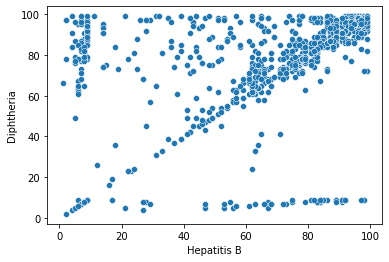

In [20]:
sns.scatterplot(x = dflifedata['Hepatitis B'], y = dflifedata['Diphtheria'])
plt.show()

In [21]:
dflifedata['Diphtheria'].max()

99.0

Based on the scatterplot, we will fill null Hepatitis B entries proportional to corresponding Diphtheria value. We will group the data into 5 group of Diphtheria:
1. under_20
2. btw_20_40
3. btw_40_60
4. btw_60_80
5. above_80
and find the average of Hepatitis B in each group and fill the nulle values accordingly. 

In [22]:
under_20 = dflifedata.loc[(dflifedata['Diphtheria'] < 20)]['Hepatitis B'].mean()
btw_20_40 = dflifedata.loc[(dflifedata['Diphtheria'] >= 20) & (dflifedata['Diphtheria'] < 40)]['Hepatitis B'].mean()
btw_40_60 = dflifedata.loc[(dflifedata['Diphtheria'] >= 40) & (dflifedata['Diphtheria'] < 60)]['Hepatitis B'].mean()
btw_60_80 = dflifedata.loc[(dflifedata['Diphtheria'] >= 60) & (dflifedata['Diphtheria'] < 80)]['Hepatitis B'].mean()
above_80 = dflifedata.loc[(dflifedata['Diphtheria'] >= 80)]['Hepatitis B'].mean()
print('under_20:', under_20, '\nbtw_20_40:',btw_20_40, '\nbtw_40_60:',btw_40_60, '\nbtw_60_80:',btw_60_80, '\nabove_80:',above_80)

under_20: 36.233870967741936 
btw_20_40: 34.93333333333333 
btw_40_60: 48.35294117647059 
btw_60_80: 63.63742690058479 
above_80: 88.39503507825148


In [23]:
# fill the null values in the Hepatitis B column
dflifedata.loc[(dflifedata['Diphtheria'] < 20) & (dflifedata['Hepatitis B'].isnull()), ['Hepatitis B']] = under_20
dflifedata.loc[(dflifedata['Diphtheria'] >= 20) & (dflifedata['Diphtheria'] < 40) & (dflifedata['Hepatitis B'].isnull()),['Hepatitis B']] = btw_20_40
dflifedata.loc[(dflifedata['Diphtheria'] >= 40) & (dflifedata['Diphtheria'] < 60) & (dflifedata['Hepatitis B'].isnull()), ['Hepatitis B']] = btw_40_60
dflifedata.loc[(dflifedata['Diphtheria'] >= 60) & (dflifedata['Diphtheria'] < 80) & (dflifedata['Hepatitis B'].isnull()),['Hepatitis B']] = btw_60_80
dflifedata.loc[(dflifedata['Diphtheria'] >= 80) & (dflifedata['Hepatitis B'].isnull()), ['Hepatitis B']] = above_80

Checking for the null counts in Hepatitis B after the filling above

In [24]:
# check the null counts in Hepatitis B column
dflifedata['Hepatitis B'].isnull().sum()

0

Great! all null values in Hepatitis B is being filled. The next is Total expenditure, which not highly correlated with any other variables. Therefore, We will fill up the values with trimmed mean value.

In [25]:
# check for the null values count in Total expenditure column
dflifedata['Total expenditure'].isnull().sum()

226

In [26]:
dflifedata['Total expenditure'] = dflifedata['Total expenditure'].fillna(value = trim_mean(dflifedata['Total expenditure'], 0.1))

In [27]:
# recheck the null values count in Total expenditure column
dflifedata['Total expenditure'].isnull().sum()

0

The null values in Total expenditure column are filled.

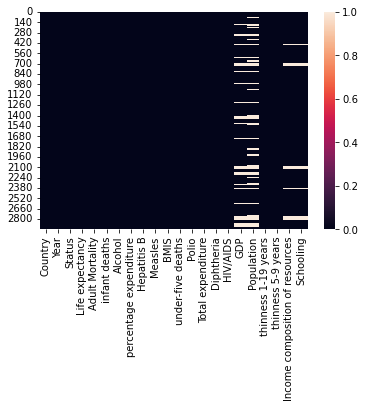

In [28]:
#plotting the remaining Null values
sns.heatmap(pd.isnull(dflifedata))
plt.show()

Based on the heatmap plot, there are only four variables remain with null values, GDP, Population, Income composition of resoiurces and schooling.
Next, let fill the null values in GDP, which is strongly correlated with percentage expenditure

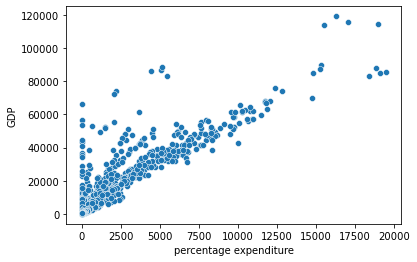

In [29]:
# plotting the scatter plot between GDP and percentage expenditure
sns.scatterplot(x = dflifedata['percentage expenditure'], y = dflifedata['GDP'])
plt.show()

Since the percentage expenditure seems to be linearly correlated with GDP. we'll use a simple linear regresssion to fill up the null values.

In [30]:
# drop the null values to make a non-Null dataframe for training
GDPTrain = dflifedata[['percentage expenditure', 'GDP']].dropna(how = 'any')

# The X axis of column with Null values
GDPTest_x = dflifedata.loc[dflifedata['GDP'].isnull(), ['percentage expenditure']]

In [31]:
# defining the model using Sklearn library
from sklearn import linear_model
reg = linear_model.LinearRegression()
X = np.array(GDPTrain['percentage expenditure']).reshape(-1,1)
y = np.array(GDPTrain.GDP).reshape(-1,1)
reg_model = reg.fit(X, y)
reg_model.coef_

array([[6.01851823]])

In [32]:
# predict the null values with the reg_model
xtest = np.array(GDPTest_x).reshape(-1,1)
y_pred = reg.predict(xtest)

In [33]:
# use the values from prediction modle to fill the null values in GDP column
dflifedata.loc[dflifedata['GDP'].isnull(), ['GDP']] = y_pred

In [34]:
# check the counts for null values in GDP column
dflifedata['GDP'].isnull().sum()

0

Great!, the null values in GDP column are filled, next is variable is population, which is mostly correlated with infant deaths

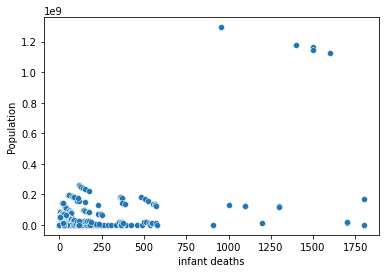

In [35]:
# plot the scatter plot between population and infant death
sns.scatterplot(x = dflifedata['infant deaths'], y = dflifedata['Population'])
plt.show()

The data seems very scatter and there is no clear relationship between these Population and infant deaths. Thus, filling up the null values in populations by the mean will not really works in this case. So, we use a different method. First let's group the data by population and name of the country.

In [36]:
# check null value counts in population
dflifedata['Population'].isnull().sum()

652

Check the population values of different countries and to see their variability over the years. Then, we can decide a method to fill up the null values in this column.

In [37]:
# Take 3 columns from our the copy of the dataset, dflifedata
countries = dflifedata[['Country','Population', 'Year']]
countries.head(12)

,Country,Population,Year
0,Afghanistan,33736494.0,2015
1,Afghanistan,327582.0,2014
2,Afghanistan,31731688.0,2013
3,Afghanistan,3696958.0,2012
4,Afghanistan,2978599.0,2011
5,Afghanistan,2883167.0,2010
6,Afghanistan,284331.0,2009
7,Afghanistan,2729431.0,2008
8,Afghanistan,26616792.0,2007
9,Afghanistan,2589345.0,2006


From the output above, it is obvous that the values in population column are inconsistent. The population of afghanistan is around 34 million people. We decide to completely omit the column of this dataset and Let's find another dataset which contain correct information about Population of countries over years. We decided to use the total population dataset.
Source: https://population.un.org/wpp/Download/Standard/CSV/ 

In [38]:
# Read from the new population dataset, WPP2022_TotalPopulationBySex
pop = pd.read_csv('WPP2022_TotalPopulationBySex.csv', low_memory = False)
pop.head()

,SortOrder,LocID,Notes,ISO3_code,ISO2_code,SDMX_code,LocTypeID,LocTypeName,ParentID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
0,NaN,1857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AUKUS,2,Medium,1950,1950.5,101683.967,104829.814,206513.782,12.096
1,NaN,1857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AUKUS,2,Medium,1951,1951.5,103204.345,106085.841,209290.187,12.259
2,NaN,1857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AUKUS,2,Medium,1952,1952.5,104727.488,107331.845,212059.333,12.421
3,NaN,1857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AUKUS,2,Medium,1953,1953.5,106093.466,108905.518,214998.984,12.593
4,NaN,1857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AUKUS,2,Medium,1954,1954.5,107669.185,110509.997,218179.182,12.779


In [39]:
# Separate the columns of interest from the pop dataset
pop1 = pop[['Location', 'Time', 'PopTotal']]

In [40]:
# merge the countries dataframe obtained from the original copy of the data with the pop1 data obtained from the new population data
mergedata = pd.merge(countries, pop1, how = 'left', left_on = ['Country', 'Year'], right_on = ['Location', 'Time'])
mergedata.head()

,Country,Population,Year,Location,Time,PopTotal
0,Afghanistan,33736494.0,2015,Afghanistan,2015.0,33753.499
1,Afghanistan,327582.0,2014,Afghanistan,2014.0,32716.210
2,Afghanistan,31731688.0,2013,Afghanistan,2013.0,31541.209
3,Afghanistan,3696958.0,2012,Afghanistan,2012.0,30466.479
4,Afghanistan,2978599.0,2011,Afghanistan,2011.0,29249.157


Next step is the substituion of population column with the newly merged one. But we need to make sure that the merge has been correctly.

In [41]:
# Check the column dimension
mergedata['PopTotal'].shape == dflifedata['Population'].shape

True

Good one, we can now proceed with the substitution

In [42]:
# substitute the Population values
dflifedata['Population'] = mergedata['PopTotal']

In [43]:
# check the counts of null values in population column
dflifedata['Population'].isnull().sum()

96

There are still some null values left in the population column. In this case we are not going to use the trimmed mean since it does not make sense to fill the null population of a country with the mean of population of all countries. So, we fill the null values with ‘bfill’ which use next valid observation to fill the gap.

In [44]:
dflifedata['Population'] = dflifedata['Population'].fillna(method = 'ffill')

In [45]:
# again check the counts of null values in population column
dflifedata['Population'].isnull().sum()

0

Nice one!, all the null values in population column are filled. Next variable is the Income composition of resources. This column is mostly correlated with schooling. However, schooling still needs to be cleaned. Meanwhile, it is also correlated with life expectency column. THus, we can use the life expectancy column.

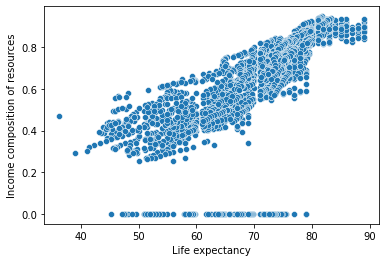

In [46]:
# scatter plot between life expectancy and Income composition
sns.scatterplot(x = dflifedata['Life expectancy'], y = dflifedata['Income composition of resources'])
plt.show()

It looks like there is linear relationship between the two variables. Therefore, we can use the linear regression technique to fill it up. However, we are still not sure what these zero income values mean. Probably they are another type of null data.

In [47]:
dflifedata['Income composition of resources'].isnull().sum()

167

In [48]:
# dropp the null values to make a non-Null dataframe for training
incomeTrain = dflifedata[['Income composition of resources', 'Life expectancy']].dropna(how = 'any')

#let's drop the zero values as well
incomeTrain1 = incomeTrain.loc[~(incomeTrain==0).all(axis=1)]

# define the x test which is Life expectancy column corresponding to income entries with null values
incomeTest_x = dflifedata.loc[dflifedata['Income composition of resources'].isnull(), ['Life expectancy']]

In [49]:
# define the model using Sklearn library
from sklearn import linear_model
reg = linear_model.LinearRegression()
X = np.array(incomeTrain['Life expectancy']).reshape(-1,1)
y = np.array(incomeTrain['Income composition of resources']).reshape(-1,1)
reg_model = reg.fit(X, y)
reg_model.coef_

array([[0.01633621]])

In [50]:
# predict the Null values with our reg_model
xtest = np.array(incomeTest_x).reshape(-1,1)
y_pred = reg.predict(xtest)

# fill up the Null values with predicted values from regression
dflifedata.loc[dflifedata['Income composition of resources'].isnull(), ['Income composition of resources']] = y_pred

In [51]:
# check the null value counts in Income composition of resources column
dflifedata['Income composition of resources'].isnull().sum()

0

Lastly, we fill the null values in the schooling column. This is mostly correlated by Income composition of resources and life expectancy. 

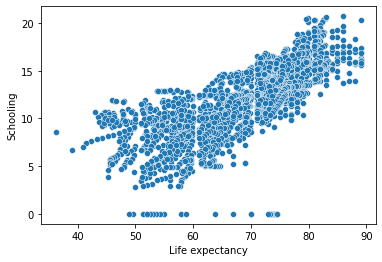

In [52]:
# scatter plot between schooling and life expectancy
sns.scatterplot(x = dflifedata['Life expectancy'], y = dflifedata['Schooling'])
plt.show()

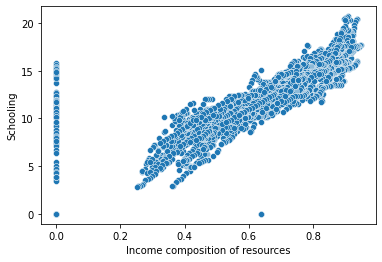

In [53]:
# scatter plot between schooling and Income composition of resources
sns.scatterplot(x = dflifedata['Income composition of resources'], y = dflifedata['Schooling'])
plt.show()

From the above two scatterplots, it seems there is a linear relationship between the variables, but the linear relationship between schooling and Income composition of resources look better. Thus, we consider the regression between these variables to fill the null values in schooling 

In [54]:
dflifedata['Schooling'].isnull().sum()

163

In [55]:
# drop the null values to make a none vale dataFrame for training
schoolTrain = dflifedata[['Income composition of resources', 'Schooling']].dropna(how = 'any')

# drop the zero values as well
schoolTrain = schoolTrain.loc[~(schoolTrain==0).all(axis=1)]

# define the x test which is Income composition of resources column corresponding to schooling entries with null values
schoolTest_x = dflifedata.loc[dflifedata['Schooling'].isnull(), ['Income composition of resources']]

In [56]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
X = np.array(schoolTrain['Income composition of resources']).reshape(-1,1)
y = np.array(schoolTrain['Schooling']).reshape(-1,1)
reg_model = reg.fit(X, y)
reg_model.coef_

array([[12.09977234]])

In [57]:
# predict the null values with our reg_model
xtest = np.array(schoolTest_x).reshape(-1,1)
y_pred = reg.predict(xtest)

#filling up the null values with predicted values from regression
dflifedata.loc[dflifedata['Schooling'].isnull(), ['Schooling']] = y_pred

In [58]:
# again check the nul value counts in Schooling
dflifedata['Schooling'].isnull().sum()

0

Done! with the data cleaning
But let check to see all the null values have being taking care off

In [59]:
dflifedata.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMIS,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.227430,164.750423,30.303948,4.468939,738.251295,78.998998,2419.592240,38.333582,42.035739,82.586463,5.959676,82.361455,1.742103,6683.743153,3.679714e+04,4.832554,4.862980,0.625545,11.970655
std,4.613841,9.507736,124.082802,117.926501,3.955541,1987.914858,24.728009,11467.272489,19.928003,160.445548,23.356472,2.401428,23.644612,5.077785,13271.348079,1.356486e+05,4.395032,4.483221,0.209868,3.310713
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,1.825000e+00,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.200000,74.000000,0.000000,1.092500,4.685343,72.000000,0.000000,19.400000,0.000000,78.000000,4.370000,78.000000,0.100000,580.486996,2.540318e+03,1.600000,1.600000,0.488250,10.000000
50%,2008.000000,72.000000,144.000000,3.000000,3.480000,64.912906,88.395035,17.000000,43.000000,4.000000,93.000000,5.950000,93.000000,0.100000,2240.564276,8.331658e+03,3.400000,3.400000,0.675000,12.300000
75%,2012.000000,75.600000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,56.100000,28.000000,97.000000,7.330000,97.000000,0.800000,4779.405190,2.482902e+04,7.100000,7.200000,0.778000,14.200000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.393715e+06,27.700000,28.600000,0.948000,20.700000


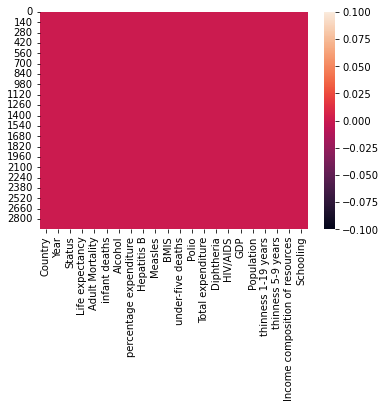

In [60]:
sns.heatmap(pd.isnull(dflifedata))
plt.show()

Great! Done with the dataset cleaning. 
Next is Exploratory Data Analysis

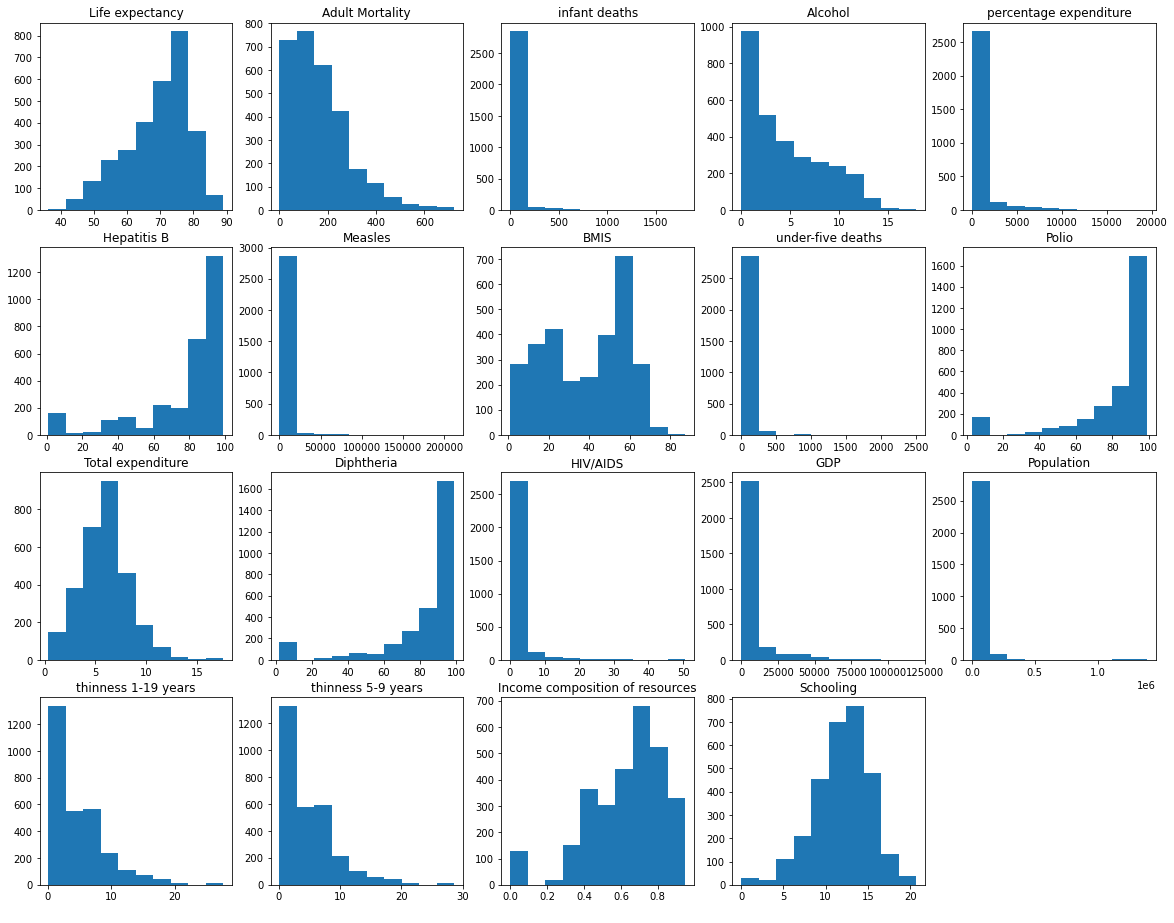

In [61]:
# Column variable distributions

#histograms
numerical_columns = ['Life expectancy', 'Adult Mortality', 'infant deaths', 'Alcohol', 
                     'percentage expenditure', 'Hepatitis B', 'Measles', 'BMIS', 'under-five deaths', 
                     'Polio', 'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 
                     'thinness 1-19 years', 'thinness 5-9 years', 'Income composition of resources', 
                     'Schooling']

plt.figure(figsize=(20, 20))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(5, 5, i)
    plt.hist(dflifedata[col])
    plt.title(col)
    plt.xlabel(' ')

Observing the histrograms, we can easily infer that some of the columns like Population are having outliers. In case of population column, the outlier data might be from India population which is significantly higher than other countries. Therefore, we are not going to remove outliers, instead we will try to import insight from them.

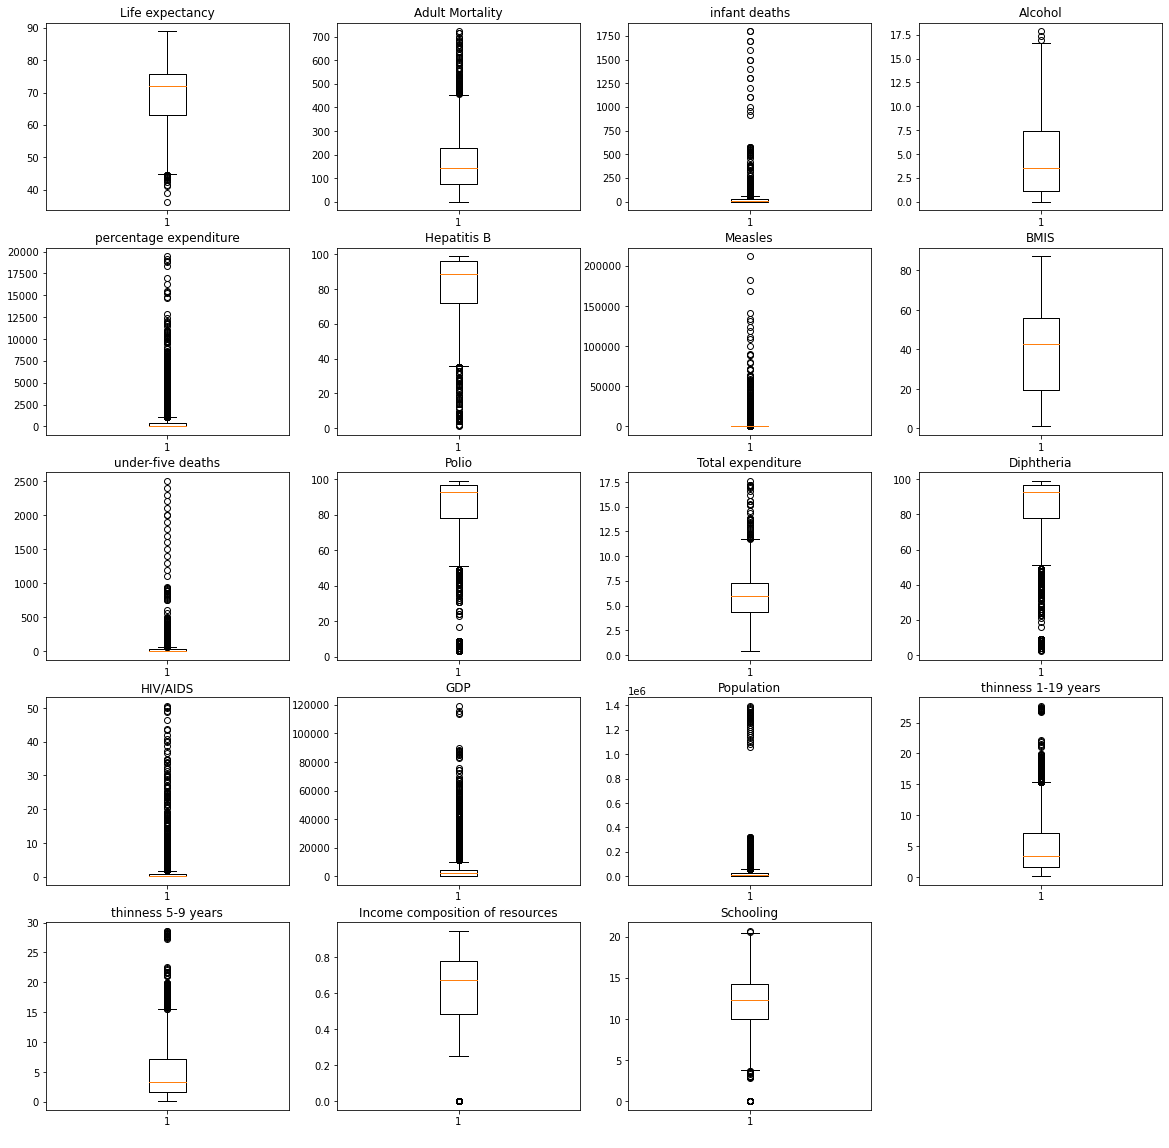

In [62]:
#boxplot to detect the outliers
numerical_columns_boxplots = ['Life expectancy', 'Adult Mortality', 'infant deaths', 'Alcohol', 
                     'percentage expenditure', 'Hepatitis B', 'Measles', 'BMIS', 'under-five deaths', 
                     'Polio', 'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 
                     'thinness 1-19 years', 'thinness 5-9 years', 'Income composition of resources', 
                     'Schooling']

plt.figure(figsize=(20, 20))
for i, col in enumerate(numerical_columns_boxplots, 1):
    plt.subplot(5, 4, i)
    plt.boxplot(dflifedata[col])
    plt.title(col)
    plt.xlabel(' ')

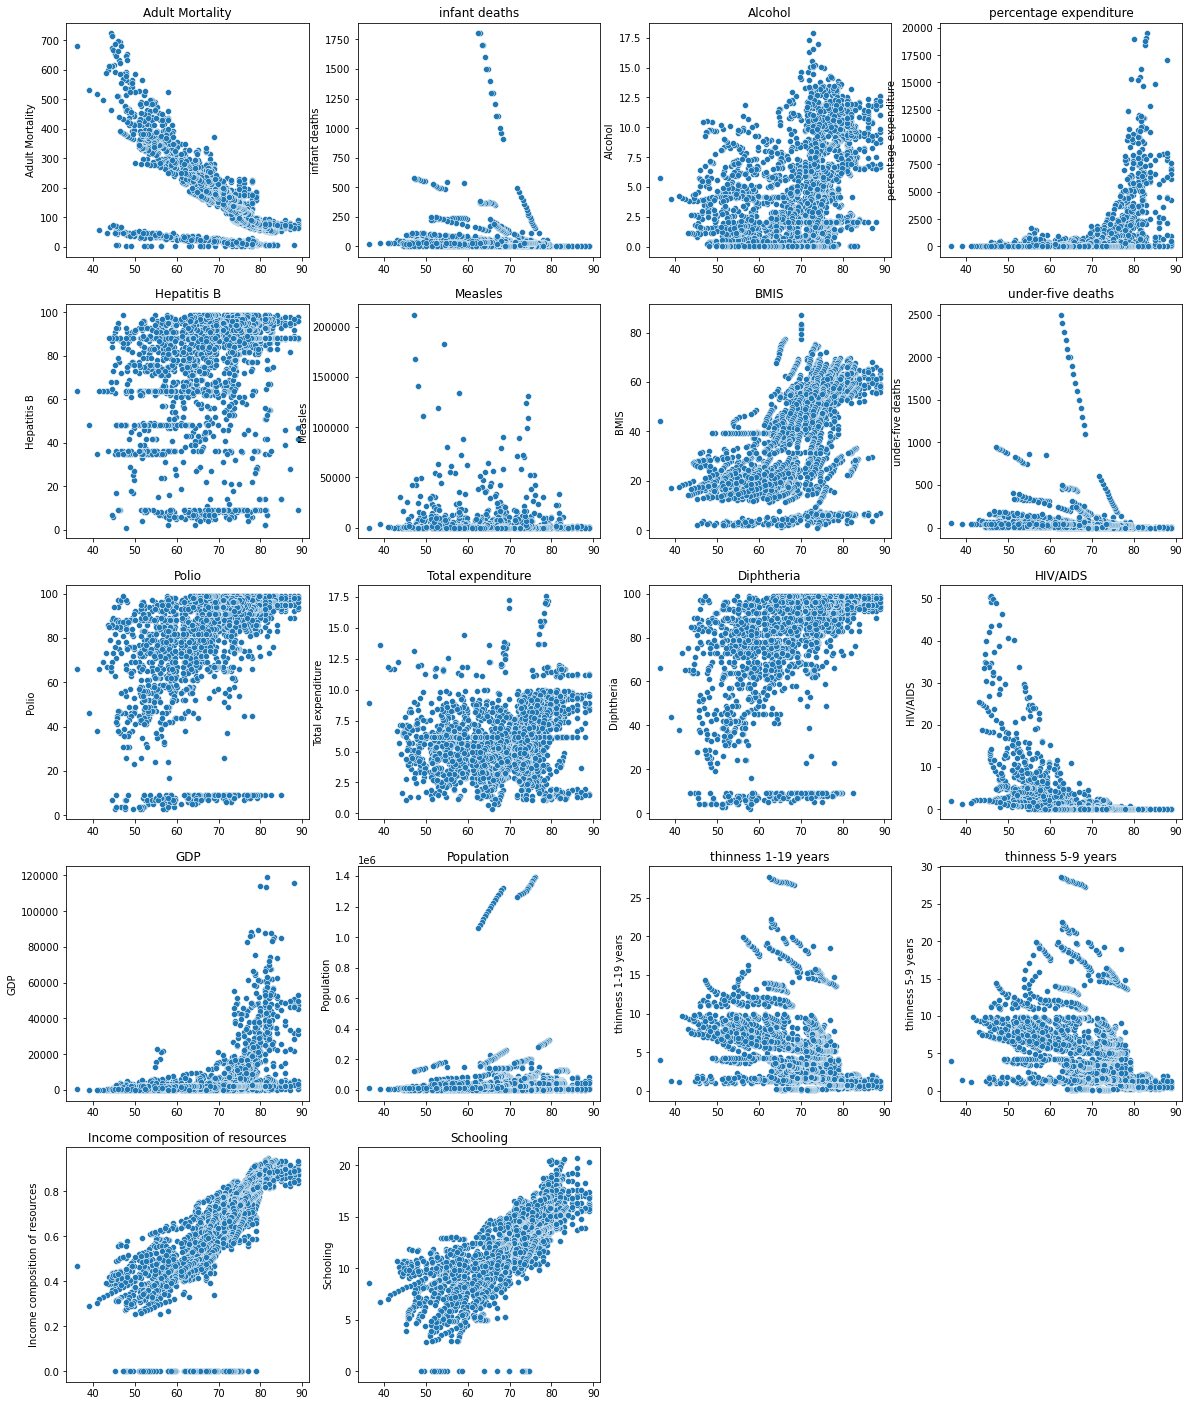

In [63]:
#scatterplot
scatter_plots = ['Adult Mortality', 'infant deaths', 'Alcohol', 
                     'percentage expenditure', 'Hepatitis B', 'Measles', 'BMIS', 'under-five deaths', 
                     'Polio', 'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 
                     'thinness 1-19 years', 'thinness 5-9 years', 'Income composition of resources', 
                     'Schooling']

plt.figure(figsize=(20, 25))
for i, col in enumerate(scatter_plots, 1):
    plt.subplot(5, 4, i)
    sns.scatterplot(x =dflifedata['Life expectancy'], y = dflifedata[col], palette="YlGnBu")
    plt.title(col)
    plt.xlabel(' ')

Let observe the difference between life expetency in developed and developing countries.

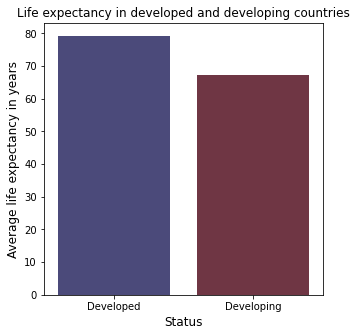

In [64]:
# Life_Expectancy vs Status using bar plot.
plt.figure(figsize=(5,5))
x = dflifedata.groupby('Status')['Status'].count().index #developed and developing
y = dflifedata.groupby('Status')['Life expectancy'].mean()
sns.barplot(x=x, y=y, palette="icefire")
plt.xlabel("Status",fontsize=12)
plt.ylabel("Average life expectancy in years",fontsize=12)
plt.title("Life expectancy in developed and developing countries")
plt.show()

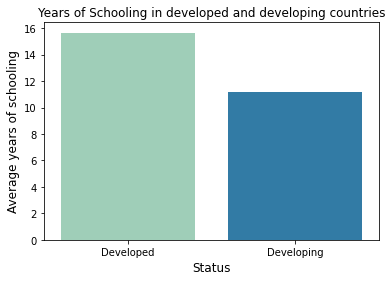

In [65]:
# Schooling vs Status using bar plot.
x = dflifedata.groupby('Status')['Status'].count().index # developing and developed
y = dflifedata.groupby('Status')['Schooling'].mean()
sns.barplot(x=x, y=y, palette="YlGnBu")
plt.xlabel("Status",fontsize=12)
plt.ylabel("Average years of schooling",fontsize=12)
plt.title("Years of Schooling in developed and developing countries")
plt.show()

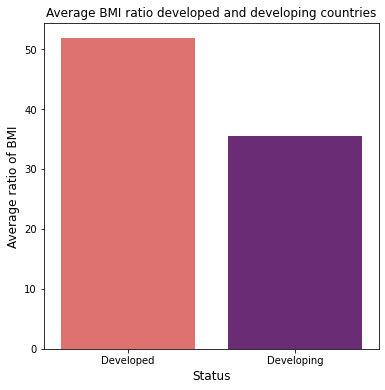

In [66]:
# BMI vs Status using bar plot.
plt.figure(figsize=(6,6))
x = dflifedata.groupby('Status')['Status'].count().index #developed and developing
y = dflifedata.groupby('Status')['BMIS'].mean()
sns.barplot(x=x,y=y, palette="magma_r")
plt.xlabel("Status",fontsize=12)
plt.ylabel("Average ratio of BMI",fontsize=12)
plt.title("Average BMI ratio developed and developing countries")
plt.show()

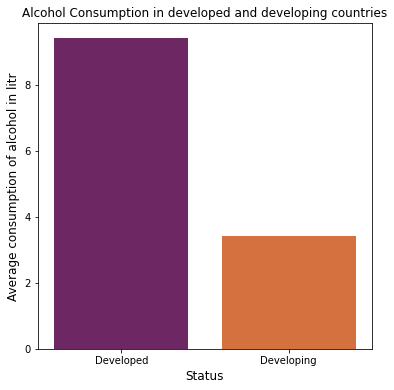

In [67]:
# Alcohol vs Status using bar plot.
plt.figure(figsize=(6,6))
x = dflifedata.groupby('Status')['Status'].count().index #developed and developing
y = dflifedata.groupby('Status')['Alcohol'].mean()
sns.barplot(x=x,y=y, palette="inferno")
plt.xlabel("Status",fontsize=12)
plt.ylabel("Average consumption of alcohol in litr",fontsize=12)
plt.title("Alcohol Consumption in developed and developing countries")
plt.show()

It is wierd but it seems as the consumption of alcohol goes higher, the life expectency increases!Let's look at the relationship between adult mortality and alcohol consumption to get a better understanding.

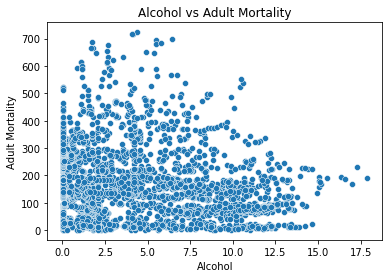

In [72]:
#alcohol vs adult mortality
sns.scatterplot(x=dflifedata['Alcohol'], y=dflifedata['Adult Mortality'], palette="magma_r")
plt.title('Alcohol vs Adult Mortality')
plt.show()

I don't see any obvious correlation between adult motality and alcohol. Let's dig deeper.

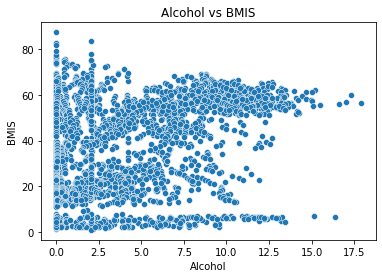

In [74]:
# Scatter plot btw alcohol & BMIS
sns.scatterplot(x=dflifedata['Alcohol'], y=dflifedata['BMIS'], palette="magma_r")
plt.title('Alcohol vs BMIS')
plt.show()

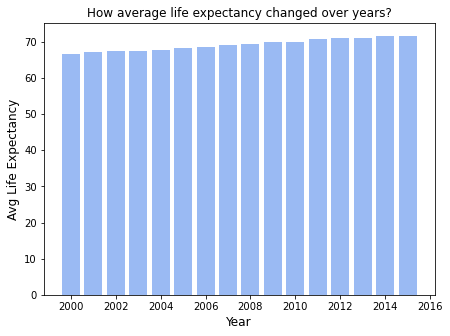

In [81]:
# Life_Expectancy in different Year using bar plot.
plt.figure(figsize=(7,5))
plt.bar(dflifedata.groupby('Year')['Year'].count().index,dflifedata.groupby('Year')['Life expectancy'].mean(),color='cornflowerblue',alpha=0.65)
plt.xlabel("Year",fontsize=12)
plt.ylabel("Avg Life Expectancy",fontsize=12)
plt.title("How average life expectancy changed over years?")
plt.show()

Modeling
Modeling life expectancy as target value and its dependent variables/predictor variables.
To do the modeling, we need a X and y variables. The target (y) value is life expectency. The predictor values X would be the rest of the columns.

In [138]:
# define X and y
y = dflifedata['Life expectancy']
X = dflifedata.drop('Life expectancy', axis =1)

The categorical data columns (e.g. country, status of development) need to be converted to numerical variable. To do this, we use dummy variables.

In [139]:
# unique values of countries
X['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany'

In [140]:
# number of unique countries
X['Country'].nunique()

193

In [141]:
# unique values of Status
X['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

In [142]:
# unique values status counts
X['Status'].nunique()

2

Then create dummy variables for country and status

In [143]:
# create dummy variabe for country, a categoric variable
country_dummy = pd.get_dummies(X['Country'])
# create dummy variabe for status, a categoric variable
status_dummy = pd.get_dummies(X['Status'])

In [144]:
# Drop the categoric variables country and status and replace them with repective dummy variable
X.drop(['Country', 'Status'], inplace = True, axis =1)

# Re place the dummy variables by concatenation
X = pd.concat([X, country_dummy, status_dummy], axis = 1)

In [145]:
X.head()

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMIS,under-five deaths,Polio,...,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe,Developed,Developing
0,2015,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,...,0,0,0,0,0,0,0,0,0,1
1,2014,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,...,0,0,0,0,0,0,0,0,0,1
2,2013,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,...,0,0,0,0,0,0,0,0,0,1
3,2012,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,...,0,0,0,0,0,0,0,0,0,1
4,2011,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,...,0,0,0,0,0,0,0,0,0,1


Split data, x into train and test dataset

In [146]:
# split data into test and train using scikit learn 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.25, random_state = 101)

Regression

In [147]:
# Build the linear regression model with sklearn libraries
from sklearn.linear_model import LinearRegression
Linear_model = LinearRegression()
Linear_model.fit(X_train, y_train)

LinearRegression()

In [148]:
# Predict target using the model
y_pred = Linear_model.predict(X_test)

Evaluate the models using R2 and RMSE metrics

In [149]:
# calculate R2
from sklearn.metrics import r2_score

r2_score(y_pred, y_test)

0.9580352704411014

In [150]:
#calculating the RMSE
from sklearn.metrics import mean_squared_error

mean_squared_error(y_pred, y_test)

3.5542344339202896

Comparing model by sklearn to statmodel and get description our model. 

In [152]:
import statsmodels.api as sm

# adding a constant column of 1 to our x to act as intercept
X_sm = sm.add_constant(X)

# model
model = sm.OLS(y, X_sm)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     348.4
Date:                Thu, 04 May 2023   Prob (F-statistic):               0.00
Time:                        11:07:22   Log-Likelihood:                -5891.6
No. Observations:                2938   AIC:                         1.221e+04
Df Residuals:                    2726   BIC:                         1.348e+04
Df Model:                         211                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

A look at R-quared (R-squared: 0.964) and Adj. R-squared (Adj. R-squared:0.962), seems that our model is good. The model converted each of dummy variables to a independent variables and showed the p-value. Here, any p-value less than 0.05 means that it is significant to our model. There are some values such Hepatitis B, BMIS, Diphtheria, thinness 1-19 years, thinness 5-9 years, and Income composition of resources have relatively high p-values which means they are not significant to our mdoel. Although the number of variables increased due to having dummy variables, the number of variables is still very less than number of observations. Therefore, using Ridge Regression for regularization would not be very useful. However, probably using lasso regression or elastic net regression would give us even better result. However our current result is very good in its current shape.

In [134]:
# lasso regression with cross validation
from sklearn.linear_model import Lasso

# buid the lasso model
lasso_model = Lasso(alpha = 1, max_iter=5000)
lasso_model.fit(x_train,y_train)

# score of the model
lasso_model.score(x_train,y_train)

0.8214298080714268

Conclusion

Observation from the lasso results, although the the score is relatively good with alpha = 1. But when the alpha = 0, we get the best results. This implies that, there is no need for lasso regerssion. we are good with linear regression.